In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import os
os.getcwd()
os.chdir('gdrive')
os.chdir('My Drive')
os.chdir('DeepResection')

!ls

'Copy of train_MAIN.ipynb'   model_mc_diff_params.h5	 model_vgg16.h5
 data			     model_mc.h5		 X_test_seg.npy
 model_1.h5		     model_resnet18.h5		 X_train_seg.npy
 model_2.h5		     model_resnet34.h5		 X_valid_seg.npy
 model_densenet.h5	     model_resnet50.h5		 Y_test_seg.npy
 model.h5		     model_test_val.h5		 Y_train_seg.npy
 model_mc_brightness.h5      model_vgg16_brightness.h5	 Y_valid_seg.npy


In [3]:
! pip install git+https://github.com/qubvel/segmentation_models

  Cloning https://github.com/qubvel/segmentation_models to /tmp/pip-req-build-703kkk5r
  Running command git clone -q https://github.com/qubvel/segmentation_models /tmp/pip-req-build-703kkk5r
  Running command git submodule update --init --recursive -q
  Created wheel for segmentation-models: filename=segmentation_models-1.0.1-cp36-none-any.whl size=33792 sha256=d35d1fb78c75b7bab574f137edc5d65d3dac07f07346023e240a398df867e2ab
  Stored in directory: /tmp/pip-ephem-wheel-cache-xnsqa07c/wheels/49/cf/46/cbb4bb64518c402aea99df9d466f1081450597e653256bbcf4
Successfully built segmentation-models


After navigating to the right directory, implement the data preprocessing/generating code

In [0]:
import numpy as np
import glob
import os
import keras
from PIL import Image
from sklearn.model_selection import train_test_split

def getListOfImagePaths(dirPath):
    imagePaths = glob.glob('data/png/*/img/*')
    ret = [os.path.join(dirPath, os.path.normpath(path)) for path in imagePaths]
    return ret

def getListOfMaskPaths(imagePaths):
    ret = [p.replace('img/', 'mask/') for p in imagePaths]
    return ret

# dim is a tuple: (192, 192)
def getImagesForClassification(imagePaths, dim):
    ret = np.empty((len(imagePaths), dim[0], dim[1]))
    index = 0
    for path in imagePaths:
        img = Image.open(path)
        img_arr = np.asarray(img)
        #crop image
        if(img_arr.shape != dim):
            if(img_arr.shape[0] != dim[0]):
                toBeRemoved = img_arr.shape[0]-dim[0]
                toBeRemoved1 = int(np.ceil(toBeRemoved/2))
                toBeRemoved2 = int(np.floor(toBeRemoved/2))
                index1 = toBeRemoved1
                index2 = img_arr.shape[0]-toBeRemoved2
                img_arr = img_arr[index1:index2,:]
            if(img_arr.shape[1] != dim[1]):
                toBeRemoved = img_arr.shape[1]-dim[1]
                toBeRemoved1 = int(np.ceil(toBeRemoved/2))
                toBeRemoved2 = int(np.floor(toBeRemoved/2))
                index1 = toBeRemoved1
                index2 = img_arr.shape[1]-toBeRemoved2
                img_arr = img_arr[:,index1:index2]
        #add image to returned array
        ret[index,:,:] = img_arr
        index=index+1
    return ret

# dim is a tuple: (256, 256)
def getImagesForSegmentation(imagePaths, dim=(256,256)):
    #ret = np.empty((len(imagePaths), dim[0], dim[1], 3))
    ret = np.empty((len(imagePaths), dim[0], dim[1]))
    index = 0
    for path in imagePaths:
        img = Image.open(path)
        img_arr = np.asarray(img)
        #pad image
        if(img_arr.shape[0] != dim[0]):
            toBeAdded = dim[0] - img_arr.shape[0]
            toBeAdded1 = int(np.ceil(toBeAdded/2))
            toBeAdded2 = int(np.floor(toBeAdded/2))
            img_arr = np.pad(img_arr, ((toBeAdded1, toBeAdded2), (0, 0)))
        if(img_arr.shape[1] != dim[1]):
            toBeAdded = dim[1] - img_arr.shape[1]
            toBeAdded1 = int(np.ceil(toBeAdded/2))
            toBeAdded2 = int(np.floor(toBeAdded/2))
            img_arr = np.pad(img_arr, ((0, 0), (toBeAdded1, toBeAdded2)))
        #add image to returned array
        ret[index,:,:] = img_arr
        #ret[index,:,:,0] = img_arr
        #ret[index,:,:,1] = img_arr
        #ret[index,:,:,2] = img_arr
        index=index+1
    return ret


dirPath = os.getcwd()
dim = (192,192)
imagePaths = getListOfImagePaths(dirPath)
#self.allImages = getImagesForClassification(self.imagePaths, dim)
#self.allMasks = getImagesForClassification(self.maskPaths, dim)
#self.X = self.allImages
#self.Y = np.empty(len(self.maskPaths))
#for maskInd in range(0, len(self.maskPaths)):
#    self.Y[maskInd] = 1 if np.any(self.allMasks[maskInd,:,:]) else 0
#self.X_train, self.X_test, self.Y_train, self.Y_test = train_test_split(self.X, self.Y, test_size = 0.25)

imagePaths_valid = []
for path in imagePaths:
    if '14_w' in path or '23_r' in path or '27_m' in path or 'pat05' in path or 'pat11' in path or 'pat15' in path or 'pat20' in path:
        imagePaths_valid.append(path)
maskPaths_valid = getListOfMaskPaths(imagePaths_valid)
imagePaths_test = []
for path in imagePaths:
    if '24_c' in path or '40_f' in path or '42_m' in path or 'pat03' in path or 'pat06' in path or 'pat25' in path or 'pat30' in path:
        imagePaths_test.append(path)
maskPaths_test = getListOfMaskPaths(imagePaths_test)
imagePaths_train = []
for path in imagePaths:
    if path not in imagePaths_valid and path not in imagePaths_test:
        imagePaths_train.append(path)
maskPaths_train = getListOfMaskPaths(imagePaths_train)

print(imagePaths_train)
print(maskPaths_train)
print(imagePaths_valid)
print(maskPaths_valid)
print(imagePaths_test)
print(maskPaths_test)

print('images train')
X_train_seg = getImagesForSegmentation(imagePaths_train)
X_train_seg = X_train_seg/255
X_train_seg = X_train_seg[..., np.newaxis]
print('images valid')
X_valid_seg = getImagesForSegmentation(imagePaths_valid)
X_valid_seg = X_valid_seg/255
X_valid_seg = X_valid_seg[..., np.newaxis]
print('images test')
X_test_seg = getImagesForSegmentation(imagePaths_test)
X_test_seg = X_test_seg/255
X_test_seg = X_test_seg[..., np.newaxis]
print('masks train')
Y_train_seg = getImagesForSegmentation(maskPaths_train)
Y_train_seg = Y_train_seg/255
Y_train_seg = (Y_train_seg > 0).astype(np.float32)
Y_train_seg = Y_train_seg[..., np.newaxis]
print('masks valid')
Y_valid_seg = getImagesForSegmentation(maskPaths_valid)
Y_valid_seg = Y_valid_seg/255
Y_valid_seg = (Y_valid_seg > 0).astype(np.float32)
Y_valid_seg = Y_valid_seg[..., np.newaxis]
print('masks test')
Y_test_seg = getImagesForSegmentation(maskPaths_test)
Y_test_seg = Y_test_seg/255
Y_test_seg = (Y_test_seg > 0).astype(np.float32)
Y_test_seg = Y_test_seg[..., np.newaxis]

#def getTrainDataForClassification(self):
#    old_shape = self.X_train.shape
#    new_shape = (old_shape[0], old_shape[1], old_shape[2], 3)
#    new_X_train = np.empty(new_shape)
#    for i in range(0, old_shape[0]):
#        new_X_train[i,:,:,0] = self.X_train[i,:,:]
#        new_X_train[i,:,:,1] = self.X_train[i,:,:]
#        new_X_train[i,:,:,2] = self.X_train[i,:,:]
#    return new_X_train, self.Y_train
    
#def getTestDataForClassification(self):
#    old_shape = self.X_test.shape
#    new_shape = (old_shape[0], old_shape[1], old_shape[2], 3)
#    new_X_test = np.empty(new_shape)
#    for i in range(0, old_shape[0]):
#        new_X_test[i,:,:,0] = self.X_test[i,:,:]
#        new_X_test[i,:,:,1] = self.X_test[i,:,:]
#        new_X_test[i,:,:,2] = self.X_test[i,:,:]
#    return new_X_test, self.Y_test

['/content/gdrive/My Drive/DeepResection/data/png/pat26/img/img_005.png', '/content/gdrive/My Drive/DeepResection/data/png/pat26/img/img_006.png', '/content/gdrive/My Drive/DeepResection/data/png/pat26/img/img_004.png', '/content/gdrive/My Drive/DeepResection/data/png/pat26/img/img_003.png', '/content/gdrive/My Drive/DeepResection/data/png/pat26/img/img_001.png', '/content/gdrive/My Drive/DeepResection/data/png/pat26/img/img_002.png', '/content/gdrive/My Drive/DeepResection/data/png/pat26/img/img_007.png', '/content/gdrive/My Drive/DeepResection/data/png/pat26/img/img_008.png', '/content/gdrive/My Drive/DeepResection/data/png/pat26/img/img_009.png', '/content/gdrive/My Drive/DeepResection/data/png/pat26/img/img_018.png', '/content/gdrive/My Drive/DeepResection/data/png/pat26/img/img_011.png', '/content/gdrive/My Drive/DeepResection/data/png/pat26/img/img_012.png', '/content/gdrive/My Drive/DeepResection/data/png/pat26/img/img_010.png', '/content/gdrive/My Drive/DeepResection/data/png/p

Save dataset to npy files

In [0]:
np.save('X_train_seg.npy', X_train_seg)
np.save('Y_train_seg.npy', Y_train_seg)
np.save('X_valid_seg.npy', X_valid_seg)
np.save('Y_valid_seg.npy', Y_valid_seg)
np.save('X_test_seg.npy', X_test_seg)
np.save('Y_test_seg.npy', Y_test_seg)

Load dataset from npy files

In [0]:
import numpy as np

X_train_seg = np.load('X_train_seg.npy')
Y_train_seg = np.load('Y_train_seg.npy')
X_valid_seg = np.load('X_valid_seg.npy')
Y_valid_seg = np.load('Y_valid_seg.npy')
X_test_seg = np.load('X_test_seg.npy')
Y_test_seg = np.load('Y_test_seg.npy')

Implement data augmentation on the training data, increasing model's generalizability



In [0]:
from tensorflow.keras.preprocessing.image import random_brightness

(num_train_samples, _, _, _) = X_train_seg.shape
X_train_seg_b = np.zeros(X_train_seg.shape)

for i in range(0, num_train_samples):
    img = X_train_seg[i,:,:,:]
    img_b = random_brightness(img, brightness_range=(0.7, 1.3))
    X_train_seg_b[i,:,:,:] = img_b

X_train_seg_b = X_train_seg_b/255

In [6]:
from keras.preprocessing.image import ImageDataGenerator

seed = 909
datagen_args = dict(rotation_range = 10, width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True, vertical_flip = True)
#mask_args = dict(rotation_range = 10, width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True, vertical_flip = True)
image_datagen = ImageDataGenerator(**datagen_args)
mask_datagen = ImageDataGenerator(**datagen_args)

image_datagen.fit(X_train_seg_b, augment = True, seed = seed)
mask_datagen.fit(Y_train_seg, augment = True, seed = seed)

image_generator = image_datagen.flow(X_train_seg_b, seed = seed, batch_size=1)
mask_generator = mask_datagen.flow(Y_train_seg, seed = seed, batch_size=1)
train_generator = (pair for pair in zip(image_generator, mask_generator))

(num_train_samples, _, _, _) = X_train_seg.shape

Using TensorFlow backend.


In [0]:
X_train_seg_f = np.zeros(X_train_seg.shape)
Y_train_seg_f = np.zeros(Y_train_seg.shape)

for step in range(0, num_train_samples):
    X_batch, Y_batch = next(train_generator)
    X_train_seg_f[step,:,:,:] = X_batch[0,:,:,:]
    Y_train_seg_f[step,:,:,:] = np.round(Y_batch[0,:,:,:])

Build general model with ImageNet starting weights

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.densenet import DenseNet121

def generate_classification_model():

    # use pre-trained weights on ImageNet as starting weights
    model = DenseNet121(include_top=False, weights='imagenet', input_shape=(192,192,3), pooling=max)

    # add sigmoid activation layer
    top_model = GlobalAveragePooling2D(input_shape=(192,192,3)) (model.layers[-1].output)
    top_model2 = Dense(1, activation='sigmoid') (top_model)
    #model.add(layers.GlobalAveragePooling2D(input_shape=(192,192,3)))
    #model.add(layers.Dense(1, activation='sigmoid'))
    #model.summary()

    #model.layers.pop()

    new_model = Model(inputs=model.input, outputs=top_model2)

    #sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    adm = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
    new_model.compile(loss='binary_crossentropy', optimizer=adm, metrics=['binary_accuracy'])
    return new_model

Train and test the model

In [0]:
# run from DeepResection directory
current_dir = os.getcwd()

data_generator = DataGenerator(current_dir)

model_detect_resection = generate_classification_model()

model_detect_resection.summary()

num_epochs = 10

batch_size = 32

X_train, Y_train = data_generator.getTrainDataForClassification()
X_test, Y_test = data_generator.getTestDataForClassification()

model_detect_resection.fit(X_train, Y_train, batch_size=batch_size, epochs=num_epochs)
score=model_detect_resection.evaluate(X_test, Y_test)

print('metrics: ')
print(model_detect_resection.metrics_names)
print('scores:')
print(score)

29089792/29084464 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 192, 192, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 198, 198, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 96, 96, 64)   9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 96, 96, 64)   256         conv1/conv[0][0]                 
_____________________________

Calculate and plot the ROC curve for the binary classification problem

auc: 
0.9979393599757159


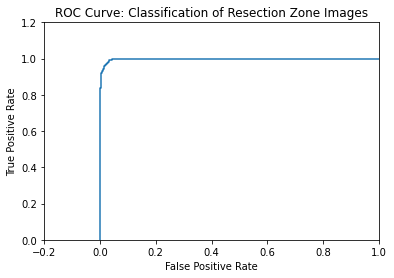

In [0]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

Y_score = model_detect_resection.predict(X_test)
fpr, tpr, thresholds = roc_curve(Y_test, Y_score)
auc = roc_auc_score(Y_test, Y_score)
print('auc: ')
print(auc)

plt.plot(fpr, tpr)
plt.axis([-0.1, 1, 0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Classification of Resection Zone Images')
plt.show()

Generate the U-Net segmentation model (this code does it from scratch)



In [0]:
from keras.applications import VGG16
from keras import Model
from keras.layers import Dense, Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate
from keras.optimizers import Adam
from keras.utils import get_custom_objects
import tensorflow.keras.backend as K

def dice_coeff(y_true, y_pred):
    epsilon = 10 ** -7
    intersection = tf.reduce_sum(y_true * y_pred)
    union = tf.reduce_sum(y_true + y_pred)
    dice_score = (2.0 * intersection + epsilon) / (union + epsilon)
    return dice_score

def dice_loss(y_true, y_pred):
    loss = 1 - dice_coeff(y_true, y_pred)
    return loss

def generate_segmentation_model(input_size=(256, 256, 1)):
    inputs = Input(input_size)

    conv1 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2,2))(conv1)

    conv2 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2,2))(conv2)

    conv3 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2,2))(conv3)

    conv4 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv4)
    pool4 = MaxPooling2D(pool_size=(2,2))(conv4)

    conv5 = Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv5)

    up6 = Conv2D(512, 2, activation='relu', padding='same', kernel_initializer='he_normal')(UpSampling2D(size=(2,2))(conv5))
    merge6 = concatenate([conv4, up6], axis=3)
    conv6 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv6)

    up7 = Conv2D(256, 2, activation='relu', padding='same', kernel_initializer='he_normal')(UpSampling2D(size=(2,2))(conv6))
    merge7 = concatenate([conv3, up7], axis=3)
    conv7 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv7)

    up8 = Conv2D(128, 2, activation='relu', padding='same', kernel_initializer='he_normal')(UpSampling2D(size=(2,2))(conv7))
    merge8 = concatenate([conv2, up8], axis=3)
    conv8 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv8)

    up9 = Conv2D(64, 2, activation='relu', padding='same', kernel_initializer='he_normal')(UpSampling2D(size=(2,2))(conv8))
    merge9 = concatenate([conv1, up9], axis=3)
    conv9 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv9)

    conv10 = Conv2D(1, 1, activation='sigmoid', padding='same', kernel_initializer='he_normal')(conv9)

    model = Model(inputs = inputs, outputs = conv10)
    model.compile(optimizer = Adam(lr = 1e-4), loss=dice_loss, metrics=[dice_coeff])
    return model

def generate_segmentation_model_pretrained(input_size=(256, 256, 3)):
    model_weights = VGG16(include_top = False, input_shape = (256, 256, 3), weights='imagenet', pooling=max)
    layers = model_weights.layers

    conv1 = layers[2].output
    conv2 = layers[5].output
    conv3 = layers[9].output
    conv4 = layers[13].output
    conv5 = layers[17].output

    up6 = Conv2D(512, 2, activation='relu', padding='same', kernel_initializer='he_normal')(UpSampling2D(size=(2,2))(conv5))
    merge6 = concatenate([conv4, up6], axis=3)
    conv6 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv6)

    up7 = Conv2D(256, 2, activation='relu', padding='same', kernel_initializer='he_normal')(UpSampling2D(size=(2,2))(conv6))
    merge7 = concatenate([conv3, up7], axis=3)
    conv7 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv7)

    up8 = Conv2D(128, 2, activation='relu', padding='same', kernel_initializer='he_normal')(UpSampling2D(size=(2,2))(conv7))
    merge8 = concatenate([conv2, up8], axis=3)
    conv8 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv8)

    up9 = Conv2D(64, 2, activation='relu', padding='same', kernel_initializer='he_normal')(UpSampling2D(size=(2,2))(conv8))
    merge9 = concatenate([conv1, up9], axis=3)
    conv9 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv9)

    conv10 = Conv2D(1, 1, activation='sigmoid', padding='same', kernel_initializer='he_normal')(conv9)

    model = Model(inputs = model_weights.inputs, outputs = conv10)
    model.compile(optimizer = Adam(lr = 1e-4), loss='dice', metrics=[dice_coeff])
    return model

Magician's Corner code (copied and pasted)

In [0]:
import numpy as np
import numpy.ma as ma
import os
import shutil
import tensorflow as tf
from keras.models import Model, load_model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, Dense, Dropout, Activation, Flatten, BatchNormalization, Reshape
from keras.engine.topology import Layer

from keras.layers.merge import concatenate, add
from keras.layers.core import Lambda
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import imageio
from natsort import natsorted
import random
import warnings
warnings.filterwarnings("ignore")

def dice_coeff(y_true, y_pred):
    # add epsilon to avoid a divide by 0 error in case a slice has no pixels set
    # we only care about relative value, not absolute so this alteration doesn't matter
    _epsilon = 10 ** -7
    intersections = tf.reduce_sum(y_true * y_pred)
    unions = tf.reduce_sum(y_true + y_pred)
    dice_scores = (2.0 * intersections + _epsilon) / (unions + _epsilon)
    return dice_scores

def dice_loss(y_true, y_pred):
    loss = 1 - dice_coeff(y_true, y_pred)
    return loss
  
get_custom_objects().update({"dice": dice_loss})

class LayerNormalization (Layer) :
    
    def call(self, x, mask=None, training=None) :
        axis = list (range (1, len (x.shape)))
        x /= K.std (x, axis = axis, keepdims = True) + K.epsilon()
        x -= K.mean (x, axis = axis, keepdims = True)
        return x
        
    def compute_output_shape(self, input_shape):
        return input_shape

def build_model(act_fn = 'relu', init_fn = 'he_normal', width=256, height = 256, channels = 1): 
    inputs = Input((width,height,channels))

    # note we use linear function before layer normalization
    conv1 = Conv2D(8, 5, activation = 'linear', padding = 'same', kernel_initializer = init_fn)(inputs)
    conv1 = LayerNormalization()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(16, 3, activation = act_fn, padding = 'same', kernel_initializer = init_fn)(pool1)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(32, 3, activation = 'linear', padding = 'same', kernel_initializer = init_fn)(pool2)
    conv3 = LayerNormalization()(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(64, 3, activation = act_fn, padding = 'same', kernel_initializer = init_fn)(pool3)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(72, 3, activation = act_fn, padding = 'same', kernel_initializer = init_fn)(pool4)

    up6 = Conv2D(64, 2, activation = 'linear', padding = 'same', kernel_initializer = init_fn)(UpSampling2D(size = (2,2))(conv5))
    up6 = LayerNormalization()(up6)
    merge6 = concatenate([conv4,up6], axis = 3)
    conv6 = Conv2D(64, 3, activation = act_fn, padding = 'same', kernel_initializer = init_fn)(merge6)

    up7 = Conv2D(32, 2, activation = act_fn, padding = 'same', kernel_initializer = init_fn)(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(32, 3, activation = act_fn, padding = 'same', kernel_initializer = init_fn)(merge7)

    up8 = Conv2D(16, 2, activation = 'linear', padding = 'same', kernel_initializer = init_fn)(UpSampling2D(size = (2,2))(conv7))
    up8 = LayerNormalization()(up8)
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(16, 3, activation = act_fn, padding = 'same', kernel_initializer = init_fn)(merge8)

    up9 = Conv2D(8, 2, activation = act_fn, padding = 'same', kernel_initializer = init_fn)(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(8, 3, activation = act_fn, padding = 'same', kernel_initializer = init_fn)(merge9)
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)
    model = Model(inputs = inputs, outputs = conv10)

    model.compile(optimizer = Adam(lr = 1e-4), loss = 'dice', metrics=[dice_coeff])
    return model

[0. 1.]


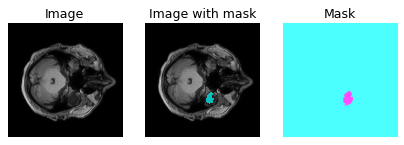

In [0]:
import matplotlib.pyplot as plt
import numpy.ma as ma

fig=plt.figure(figsize=(130, 130), dpi = 75)

#i=0
while np.sum(Y_train_seg_f[i,:,:,0]) < 200:
    i = i+1

X = X_train_seg_f[i,:,:,0]
Y = Y_train_seg_f[i,:,:,0]
print(np.unique(Y))

mask = ma.masked_where(Y != 1.0, Y)
    
fig.add_subplot(3, 3, 1)
plt.imshow(X, cmap = "gray")
plt.title("Image")
plt.axis('off')

fig.add_subplot(3, 3, 2)
plt.imshow(X, cmap = "gray")
plt.imshow(mask, 'cool', alpha=0.7)
plt.title("Image with mask")
plt.axis('off')

fig.add_subplot(3, 3, 3)
plt.imshow(Y, 'cool', alpha=0.7)
plt.title("Mask")
plt.axis('off')
    
plt.subplots_adjust(bottom=0.1, left = 0.01, right=0.05, top=0.3)
plt.show()
i=i+20

Train model based on Magician's Corner code

In [16]:
model = build_model(act_fn = 'relu', init_fn = 'he_normal', width=256, height = 256, channels = 1)
checkpointer = ModelCheckpoint('model_mc_brightness.h5', verbose=1, save_best_only=True)

epochs = 35
batch_size = 64
steps_per_epoch = np.ceil(num_train_samples/64.0)

results = model.fit(X_train_seg_f, Y_train_seg_f, validation_data = (X_valid_seg, Y_valid_seg), epochs = epochs, batch_size=batch_size, callbacks=[checkpointer])

Train on 3530 samples, validate on 1080 samples
Epoch 1/35
3530/3530 [==============================] - 51s 14ms/step - loss: 0.9929 - dice_coeff: 0.0070 - val_loss: 0.9938 - val_dice_coeff: 0.0062

Epoch 00001: val_loss improved from inf to 0.99377, saving model to model_mc_brightness.h5
Epoch 2/35
3530/3530 [==============================] - 39s 11ms/step - loss: 0.9902 - dice_coeff: 0.0099 - val_loss: 0.9906 - val_dice_coeff: 0.0093

Epoch 00002: val_loss improved from 0.99377 to 0.99060, saving model to model_mc_brightness.h5
Epoch 3/35
3530/3530 [==============================] - 39s 11ms/step - loss: 0.9510 - dice_coeff: 0.0482 - val_loss: 0.9062 - val_dice_coeff: 0.0931

Epoch 00003: val_loss improved from 0.99060 to 0.90618, saving model to model_mc_brightness.h5
Epoch 4/35
3530/3530 [==============================] - 39s 11ms/step - loss: 0.6285 - dice_coeff: 0.3659 - val_loss: 0.8666 - val_dice_coeff: 0.1324

Epoch 00004: val_loss improved from 0.90618 to 0.86664, saving mode

Test the model based on Magician's Corner code

1080/1080 [==============================] - 4s 3ms/step


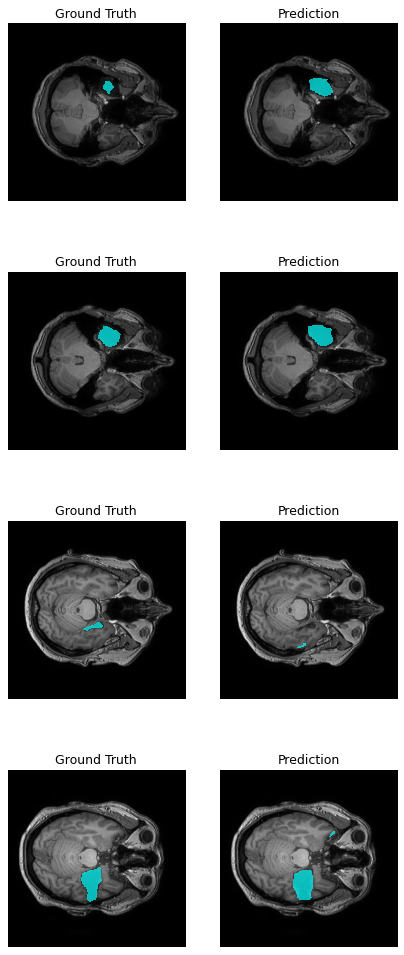

The dice score for this model is:  0.679976776509087


In [18]:
model.load_weights('./model_mc_brightness.h5')
preds_test = model.predict(X_test_seg, verbose=1)
preds_test = (preds_test > 0.5).astype(np.uint8)

def np_dice(true, pred):
    intersection = np.sum(true * pred)
    dc =(2.0 * intersection) / (np.sum(true) + np.sum(pred))
    return dc

fig=plt.figure(figsize=(130, 130), dpi = 75)

i=0
for j in range(0,8,2):
    while np.sum(Y_test_seg[i,:,:,0]) < 200:
        i = i+1
    image = X_test_seg[i,...,0]
    mask =  Y_test_seg[i,...,0]
    mask = ma.masked_where(mask == 0, mask)
    pred = preds_test[i,...,0]
    pred = ma.masked_where(pred == 0, pred)
    
    fig.add_subplot(8, 2, j+1)
    plt.imshow(image, cmap = "gray")
    plt.imshow(mask, 'cool', alpha=0.7)
    plt.title("Ground Truth")
    plt.axis('off')
    
    fig.add_subplot(8, 2, j+2)
    plt.imshow(image, cmap = "gray")
    plt.imshow(pred, 'cool', alpha=0.7)
    plt.title("Prediction")
    plt.axis('off')
    i = i+20
    
plt.subplots_adjust(bottom=0.1, left = 0.01, right=0.05, top=0.3)
plt.show()

print("The dice score for this model is: ", np_dice(Y_test_seg, preds_test))

Train the model from scratch using the exact model architecture from the original UNet paper (this cell takes too long to run)

In [0]:
# run from DeepResection directory
from keras.callbacks import ModelCheckpoint

model_resection_segmentation = generate_segmentation_model()
checkpointer = ModelCheckpoint('model_original.h5', verbose=1, save_best_only=True)

num_epochs = 35
batch_size = 4
#steps_per_epoch = np.ceil(num_train_samples/8.0)

model_resection_segmentation.fit(X_train_seg_f, Y_train_seg_f, validation_data = (X_valid_seg, Y_valid_seg), batch_size = batch_size, epochs=num_epochs, callbacks = [checkpointer])


Train on 3530 samples, validate on 1080 samples
Epoch 1/35
3530/3530 [==============================] - 714s 202ms/step - loss: 0.9997 - dice_coeff: 2.5306e-04 - val_loss: 1.0000 - val_dice_coeff: 2.0296e-11

Epoch 00001: val_loss improved from inf to 1.00000, saving model to model_original.h5
Epoch 2/35
3530/3530 [==============================] - 703s 199ms/step - loss: 1.0000 - dice_coeff: 1.7477e-11 - val_loss: 1.0000 - val_dice_coeff: 2.0296e-11

Epoch 00002: val_loss did not improve from 1.00000
Epoch 3/35
3530/3530 [==============================] - 705s 200ms/step - loss: 1.0000 - dice_coeff: 1.7203e-11 - val_loss: 1.0000 - val_dice_coeff: 2.0296e-11

Epoch 00003: val_loss did not improve from 1.00000
Epoch 4/35
3530/3530 [==============================] - 707s 200ms/step - loss: 1.0000 - dice_coeff: 1.7249e-11 - val_loss: 1.0000 - val_dice_coeff: 2.0297e-11

Epoch 00004: val_loss did not improve from 1.00000
Epoch 5/35
3530/3530 [==============================] - 704s 199ms/st

Train the UNet using a pre-trained encoder with a specific architecture, with the API provided in the Github repo

In [0]:
import segmentation_models as sm

num_epochs = 35

batch_size = 64

BACKBONE = 'vgg16'
#preprocess_input = sm.get_preprocessing(BACKBONE)
#X_train_seg_p = preprocess_input(X_train_seg)
#X_test_seg_p = preprocess_input(X_test_seg)
#X_valid_seg_p = preprocess_input(X_valid_seg)
base_model = sm.Unet(BACKBONE, encoder_weights='imagenet', classes=1, activation='sigmoid')
inp = Input(shape=(256, 256, 1))
l1 = Conv2D(3, (1, 1)) (inp)
out = base_model(l1)
model = Model(inp, out, name = base_model.name)
checkpointer = ModelCheckpoint('model_vgg16_brightness.h5', verbose=1, save_best_only=True)
model.compile(optimizer = Adam(lr = 1e-4), loss=dice_loss, metrics=[dice_coeff])
steps_per_epoch = np.ceil(num_train_samples/64.0)
batch_size = 16
results = model.fit(X_train_seg_f, Y_train_seg_f, validation_data = (X_valid_seg, Y_valid_seg), batch_size=batch_size, epochs = num_epochs, callbacks=[checkpointer])

Train on 3530 samples, validate on 1080 samples
Epoch 1/35
3530/3530 [==============================] - 251s 71ms/step - loss: 0.9882 - dice_coeff: 0.0118 - val_loss: 0.9967 - val_dice_coeff: 0.0033

Epoch 00001: val_loss improved from inf to 0.99667, saving model to model_vgg16_brightness.h5
Epoch 2/35
3530/3530 [==============================] - 230s 65ms/step - loss: 0.9567 - dice_coeff: 0.0432 - val_loss: 0.9969 - val_dice_coeff: 0.0030

Epoch 00002: val_loss did not improve from 0.99667
Epoch 3/35
3530/3530 [==============================] - 227s 64ms/step - loss: 0.7379 - dice_coeff: 0.2627 - val_loss: 0.9979 - val_dice_coeff: 0.0021

Epoch 00003: val_loss did not improve from 0.99667
Epoch 4/35
3530/3530 [==============================] - 229s 65ms/step - loss: 0.5086 - dice_coeff: 0.4919 - val_loss: 0.9997 - val_dice_coeff: 2.7290e-04

Epoch 00004: val_loss did not improve from 0.99667
Epoch 5/35
3530/3530 [==============================] - 228s 65ms/step - loss: 0.4117 - dice_

KeyboardInterrupt: ignored

1080/1080 [==============================] - 7s 7ms/step












































































































































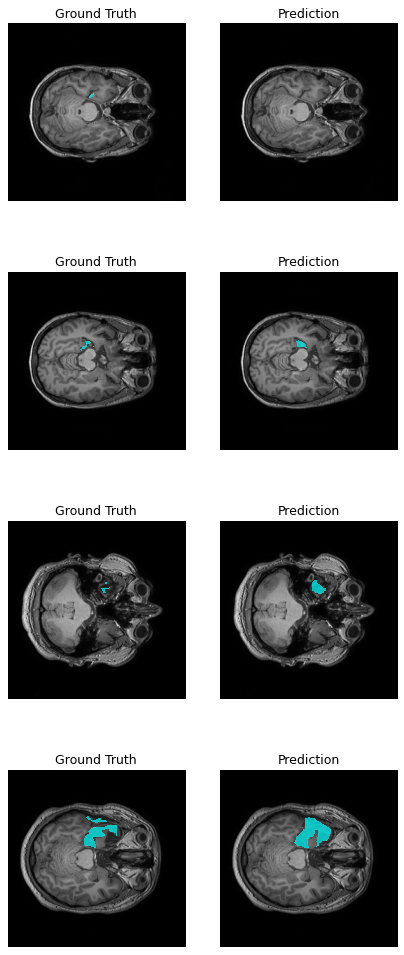

The dice score for this model is:  0.7321075632235253


In [0]:
model.load_weights('./model_densenet.h5')
preds_test = model.predict(X_valid_seg, verbose=1)
preds_test = (preds_test > 0.5).astype(np.uint8)

def np_dice(true, pred):
    intersection = np.sum(true * pred)
    dc =(2.0 * intersection) / (np.sum(true) + np.sum(pred))
    return dc

fig=plt.figure(figsize=(130, 130), dpi = 75)

i=0
for j in range(0,8,2):
    while np.sum(Y_valid_seg[i,:,:,0]) < 50:
        i = i+1
        print()
    image = X_valid_seg[i,...,0]
    mask =  Y_valid_seg[i,...,0]
    mask = ma.masked_where(mask == 0, mask)
    pred = preds_test[i,...,0]
    pred = ma.masked_where(pred == 0, pred)
    
    fig.add_subplot(8, 2, j+1)
    plt.imshow(image, cmap = "gray")
    plt.imshow(mask, 'cool', alpha=0.7)
    plt.title("Ground Truth")
    plt.axis('off')
    
    fig.add_subplot(8, 2, j+2)
    plt.imshow(image, cmap = "gray")
    plt.imshow(pred, 'cool', alpha=0.7)
    plt.title("Prediction")
    plt.axis('off')
    i = i+20
    
plt.subplots_adjust(bottom=0.1, left = 0.01, right=0.05, top=0.3)
plt.show()

print("The dice score for this model is: ", np_dice(Y_valid_seg, preds_test))

Run this to reset variables when debugging

In [0]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
